In [1]:
import h5py
import pylab as pl
import numpy as np
import matplotlib.colors as mpc
import networkx
import ipyvolume as ipv
import progressbar

In [2]:
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)

In [3]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_tree.dat')

In [4]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [5]:
gal = 4341 # I love this one
centre = 4337
offGas = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][gal].astype('int')
RotMass = sim['SnapNumber_128/SubGroups/PartType4/RotationMatrix'][gal]

In [6]:
cenGas = sim['SnapNumber_128/SubGroups/SubGroupPos'][gal]
posgal = sim['SnapNumber_128/PartType4/Coordinates'][offGas[0]:offGas[1]]

In [7]:
x, y, z = posgal[:,0]-cenGas[0], posgal[:,1]-cenGas[1], posgal[:,2]-cenGas[2]

ipv.figure(height=750, width=750)

sca = ipv.scatter(x, y, z, marker='sphere', size=.5)

ipv.show()

In [8]:
RotI = np.linalg.inv(RotMass)
RotII = RotMass.T

In [9]:
RotI, RotII

(array([[ 0.12266204, -0.24267111,  0.96232258],
        [-0.24267111,  0.93287733,  0.2661778 ],
        [-0.96232258, -0.2661778 ,  0.05553937]]),
 array([[ 0.12266204, -0.24267111,  0.96232258],
        [-0.24267111,  0.93287733,  0.2661778 ],
        [-0.96232258, -0.2661778 ,  0.05553937]]))

In [10]:
R = np.array([0., 0., 1.])
R_rot = np.dot(RotI, R.T).T

In [11]:
R_rot

array([0.96232258, 0.2661778 , 0.05553937])

In [12]:
ipv.figure(height=750, width=750)

zero= np.array([0.])

sca = ipv.scatter(x, y, z, marker='sphere', size=.5)
quiv = ipv.quiver(zero, zero, zero, np.array([R_rot[0]]), np.array([R_rot[1]]), np.array([R_rot[2]]), color='black')

ipv.show()

In [13]:
newcoords = np.array([x, y, z])
rotcoords = np.dot(RotMass, newcoords).T

In [14]:
nx, ny, nz = rotcoords[:,0], rotcoords[:,1], rotcoords[:,2]

ipv.figure(height=750, width=750)

zero= np.array([0.])

sca = ipv.scatter(nx, ny, nz, marker='sphere', size=.5)
ipv.show()

In [15]:
# and now lets see how this is related to the L_z
Sats = h5py.File('SatelliteList_V2_cont1R200.h5', 'r')

In [16]:
sim['SnapNumber_128/SubGroups/SubGroupSpin']

<HDF5 dataset "SubGroupSpin": shape (6033, 3), type "<f4">

In [17]:
Spin = sim['SnapNumber_128/SubGroups/SubGroupSpin'][gal]

In [18]:
Spin

array([23.261883 ,  3.1515305, -1.0992256], dtype=float32)

In [19]:
ipv.figure(height=750, width=750)

zero= np.array([0.])

sca = ipv.scatter(x, y, z, marker='sphere', size=.5)
quiv = ipv.quiver(zero, zero, zero, np.array([Spin[0]]), np.array([Spin[1]]), np.array([Spin[2]]), color='black')
quiv = ipv.quiver(zero, zero, zero, np.array([R_rot[0]]), np.array([R_rot[1]]), np.array([R_rot[2]]), color='green')

ipv.show()

In [20]:
Spin, R_rot

(array([23.261883 ,  3.1515305, -1.0992256], dtype=float32),
 array([0.96232258, 0.2661778 , 0.05553937]))

In [21]:
Spin/np.sqrt(np.sum(Spin**2.))

array([ 0.98986226,  0.134107  , -0.04677532], dtype=float32)

In [22]:
R_rot/np.sqrt(np.sum(R_rot**2))

array([0.96232258, 0.2661778 , 0.05553937])

In [23]:
np.sqrt(np.sum(Spin**2.))

23.50012

In [24]:
# anyway, the diference with the centre and vel
velGal = sim['SnapNumber_128/SubGroups/SubGroupVel'][gal]
cenGro = sim['SnapNumber_128/SubGroups/SubGroupPos'][centre]
velGro = sim['SnapNumber_128/SubGroups/SubGroupVel'][centre]

In [25]:
vecCen = cenGro - cenGas
vecVel = velGal - velGro

In [26]:
ipv.figure(height=750, width=750)

zero= np.array([0.])

sca = ipv.scatter(x, y, z, marker='sphere', size=.5)
quiv = ipv.quiver(zero, zero, zero, np.array([R_rot[0]]), np.array([R_rot[1]]), np.array([R_rot[2]]), color='green')
quiv = ipv.quiver(zero, zero, zero, np.array([vecCen[0]]), np.array([vecCen[1]]), np.array([vecCen[2]]), color='black')
quiv = ipv.quiver(zero, zero, zero, np.array([vecVel[0]]), np.array([vecVel[1]]), np.array([vecVel[2]]), color='purple')

ipv.show()

In [27]:
vecCenN = vecCen/np.sqrt(np.sum(vecCen**2.))
vecVelN = vecVel/np.sqrt(np.sum(vecVel**2.))

In [28]:
ipv.figure(height=750, width=750)

zero= np.array([0.])

#sca = ipv.scatter(x, y, z, marker='sphere', size=.5)
quiv = ipv.quiver(zero, zero, zero, np.array([R_rot[0]]), np.array([R_rot[1]]), np.array([R_rot[2]]), color='green')
quiv = ipv.quiver(zero, zero, zero, np.array([vecCenN[0]]), np.array([vecCenN[1]]), np.array([vecCenN[2]]), color='black')
quiv = ipv.quiver(zero, zero, zero, np.array([vecVelN[0]]), np.array([vecVelN[1]]), np.array([vecVelN[2]]), color='purple')

ipv.show()

In [29]:
# and cosines
cosCen = np.dot(R_rot, vecCenN)
cosVel = np.dot(R_rot, vecVelN)

In [30]:
cosCen, cosVel

(-0.9617047452183581, -0.6682700819284706)

In [31]:
#  ok, now lets see this as a serial thing..
import time as tm

a1 = tm.time()

for i in range(1000):
    RotI = np.linalg.inv(RotMass)

a2 = tm.time()

b1 = tm.time()

for i in range(10000):
    RotII = RotMass.T

b2 = tm.time()

b2-b1, a2-a1

# and is waaay fastar to transpose than to invert, well, i need to be sure.

(0.0018322467803955078, 0.005495309829711914)

In [32]:
def getAngles(gal, centre):
    offGas = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][gal].astype('int')
    RotMass = sim['SnapNumber_128/SubGroups/PartType4/RotationMatrix'][gal]
    cenGas = sim['SnapNumber_128/SubGroups/SubGroupPos'][gal]
    RotII = RotMass.T
    R = np.array([0., 0., 1.])
    R_rot = np.dot(RotII, R.T).T
    
    velGal = sim['SnapNumber_128/SubGroups/SubGroupVel'][gal]
    cenGro = sim['SnapNumber_128/SubGroups/SubGroupPos'][centre]
    velGro = sim['SnapNumber_128/SubGroups/SubGroupVel'][centre]
    
    vecCen = cenGro - cenGas
    vecVel = velGal - velGro
    
    vecCenN = vecCen/np.sqrt(np.sum(vecCen**2.))
    vecVelN = vecVel/np.sqrt(np.sum(vecVel**2.))
    
    # and cosines
    cosCen = np.dot(R_rot, vecCenN)
    cosVel = np.dot(R_rot, vecVelN)
    
    Ls = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][offGas[0]:offGas[1]]
    Lz = Ls[:,2]
    L = np.sqrt(Ls[:,0]**2+Ls[:,1]**2+Ls[:,2]**2)
    LzL = Lz/L
    
    ii = np.where(np.isnan(LzL)==False)
    LzL = LzL[ii]
    
    LzM = np.mean(LzL)
    
    return cosCen, cosVel, LzM

In [33]:
getAngles(4470, 4469)

<ipython-input-32-7f02deb14e7e>:26: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


(0.39997274169252445, -0.616386161160301, 0.593409752020417)

In [34]:
Sats = h5py.File('SatelliteList_V2_cont1R200.h5', 'r')
Sats.keys()

<KeysViewHDF5 ['SatelliteCentral', 'SatelliteList']>

In [35]:
sats = Sats['SatelliteList'][()]
cent = Sats['SatelliteCentral'][()]

In [36]:
CosCen, CosVel, LZM = [], [], []
Satsurv, Centsurv = [], []

pbar = progressbar.ProgressBar(max_value=sats.size)

c = 0
for ss, cc in zip(sats, cent):
    cosc, cosv, lzm = getAngles(ss, cc)
    if np.isnan(lzm)==False:
        CosCen.append(cosc)
        CosVel.append(cosv)
        LZM.append(lzm)
        Satsurv.append(ss)
        Centsurv.append(cc)
    c += 1
    pbar.update(c)
    
CosCen, CosVel, LZM = np.array(CosCen), np.array(CosVel), np.array(LZM)
Satsurv, Centsurv = np.array(Satsurv), np.array(Centsurv)

<ipython-input-32-7f02deb14e7e>:26: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L
N/A% (0 of 515) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/home/srodriguez/miniconda3/envs/cielo_tutorial/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/srodriguez/miniconda3/envs/cielo_tutorial/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 96% (496 of 515) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00

Text(0, 0.5, 'number of galaxies')

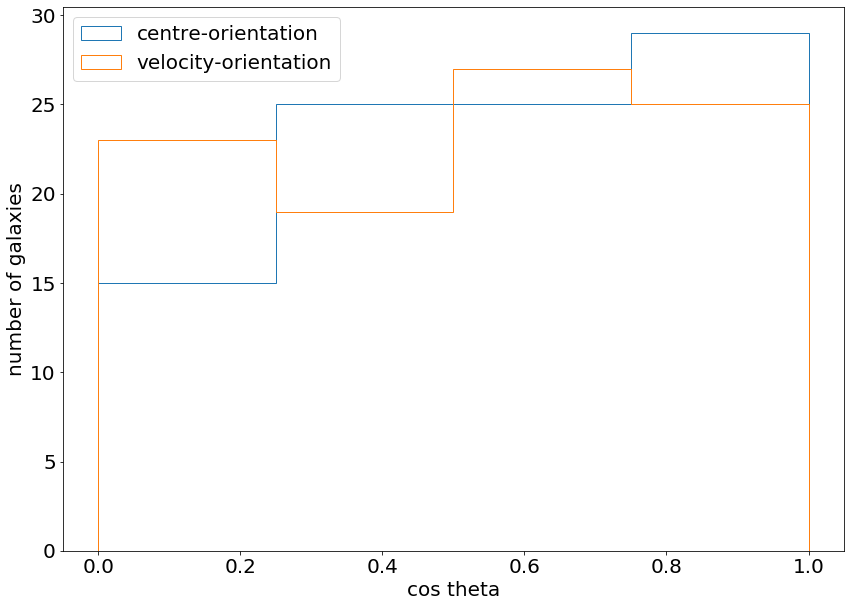

In [37]:
pl.figure(figsize=(14, 10))

pl.hist(np.abs(CosCen), label='centre-orientation', histtype='step', range=(0,1.), bins=4)
pl.hist(np.abs(CosVel), label='velocity-orientation', histtype='step', range=(0,1.), bins=4)

pl.legend(loc=2)
pl.xlabel('cos theta')
pl.ylabel('number of galaxies')

In [38]:
np.where(np.isnan(LZM)==False)[0].size

94

Text(0, 0.5, 'number of galaxies')

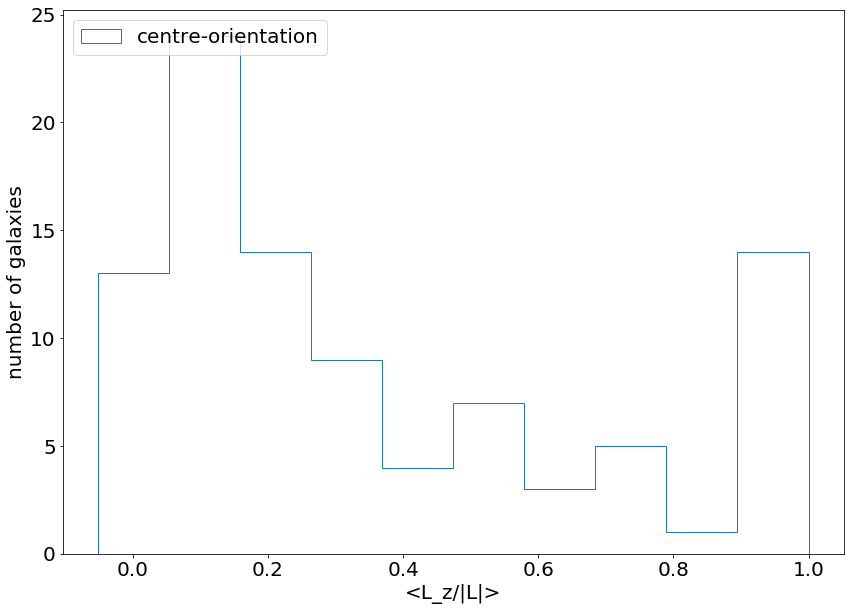

In [39]:
pl.figure(figsize=(14, 10))

pl.hist(LZM, label='centre-orientation', histtype='step')

pl.legend(loc=2)
pl.xlabel('<L_z/|L|>')
pl.ylabel('number of galaxies')

In [40]:
medLZ = np.median(LZM)

In [41]:
i1 = np.where(LZM<medLZ)
i2 = np.where(LZM>medLZ)

Text(0, 0.5, 'number of galaxies')

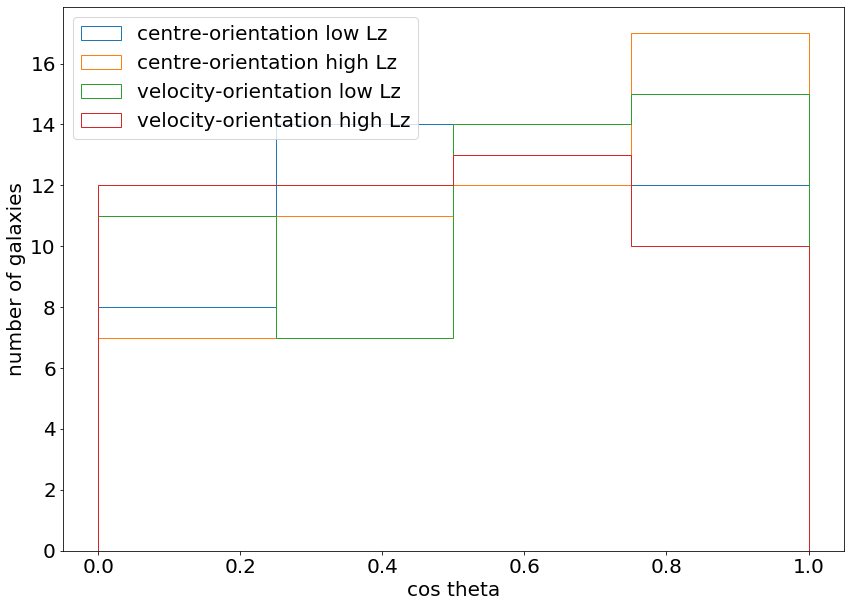

In [42]:
pl.figure(figsize=(14, 10))

pl.hist(np.abs(CosCen[i1]), label='centre-orientation low Lz', histtype='step', range=(0,1.), bins=4)
pl.hist(np.abs(CosCen[i2]), label='centre-orientation high Lz', histtype='step', range=(0,1.), bins=4)

pl.hist(np.abs(CosVel[i1]), label='velocity-orientation low Lz', histtype='step', range=(0,1.), bins=4)
pl.hist(np.abs(CosVel[i2]), label='velocity-orientation high Lz', histtype='step', range=(0,1.), bins=4)

pl.legend(loc=2)
pl.xlabel('cos theta')
pl.ylabel('number of galaxies')

In [43]:
# with h5py.File('SatelliteList_V2_withAngles.h5', 'w') as f:
#     f.create_dataset('SatelliteList', data=Satsurv)
#     f.create_dataset('SatelliteCentral', data=Centsurv)
#     f.create_dataset('CosCen', data=CosCen)
#     f.create_dataset('CosVel', data=CosVel)
#     f.create_dataset('LZ_L', data=LZM)

In [44]:
# and now lets take into account the time variation, lets see.

def getAnglesTime(gal, centre, snap):
    offGas = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][gal].astype('int')
    RotMass = sim['SnapNumber_{}/SubGroups/PartType4/RotationMatrix'.format(snap)][gal]
    cenGas = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][gal]
    RotII = RotMass.T
    R = np.array([0., 0., 1.])
    R_rot = np.dot(RotII, R.T).T
    
    velGal = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][gal]
    cenGro = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][centre]
    velGro = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][centre]
    
    vecCen = cenGro - cenGas
    vecVel = velGal - velGro
    
    sep = np.sqrt(np.sum(vecCen**2))
    
    gro = sim['SnapNumber_{}/SubGroups/GroupNumber'.format(snap)][centre]
    R200 = sim['SnapNumber_{}/Groups/Group_R_Crit200'.format(snap)][gro]
    
    sepr200 = sep/R200
    
    vecCenN = vecCen/sep
    vecVelN = vecVel/np.sqrt(np.sum(vecVel**2.))
    
    # and cosines
    cosCen = np.dot(R_rot, vecCenN)
    cosVel = np.dot(R_rot, vecVelN)
    
    Ls = sim['SnapNumber_{}/PartType4/SpecificAngularMomentum'.format(snap)][offGas[0]:offGas[1]]
    Lz = Ls[:,2]
    L = np.sqrt(Ls[:,0]**2+Ls[:,1]**2+Ls[:,2]**2)
    LzL = Lz/L
    
    ii = np.where(np.isnan(LzL)==False)
    LzL = LzL[ii]
    
    LzM = np.mean(LzL)
    
    return cosCen, cosVel, LzM, sepr200

def getTime(ff, cc, number=100):
    uniqueID = int(128*1e6+ff)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    # and the centre
    uniqueIDC = int(128*1e6+cc)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    cosC, cosV, LZ, dist = [], [], [], []
    z, snaplist = [], []
    
    for mm, mmC in zip(mtree, mtreeC):
        snap, ffT = split_unique_id(int(mm))
        snapC, ccT = split_unique_id(int(mmC))
        if snap==snapC:
            Off = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][ffT].astype('int')
            Np = Off[1]-Off[0]
            if Np>number:
            
                cosCt, cosVt, LzT, distT = getAnglesTime(ffT, ccT, snap)
            
                cosC.append(cosCt)
                cosV.append(cosVt)
                LZ.append(LzT)
                dist.append(distT)
                zi = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
                z.append(zi)
                snaplist.append(snap)

    cosC, cosV, LZ, dist = np.array(cosC), np.array(cosV), np.array(LZ), np.array(dist)
    z, snaplist = np.array(z), np.array(snaplist)
    
    return cosC, cosV, LZ, dist, z, snaplist

In [45]:
# lest test this, if works

cosC, cosV, LZ, dist, zs, snaps = getTime(4470, 4469, number=100)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


In [46]:
cosC

array([ 0.39997274,  0.40007483,  0.21074114,  0.02006321, -0.13232295,
       -0.2426875 , -0.32946262, -0.35473719, -0.36443384, -0.42365611,
       -0.49111871, -0.57046957, -0.65285748, -0.72211317, -0.79059651,
       -0.84375098, -0.87678663, -0.90198049, -0.90179797, -0.88750956,
       -0.86889399, -0.84736251, -0.81471398, -0.76030282, -0.6860425 ,
       -0.64822736, -0.55261154, -0.39163817, -0.27185739, -0.18011031,
       -0.06066512, -0.24238327, -0.1426395 ,  0.01844044,  0.24586068,
        0.3394173 ,  0.41804812,  0.54064035,  0.61762486,  0.68783466,
        0.76359044,  0.81633465,  0.8614868 ,  0.87432657,  0.91035427,
        0.87400301,  0.83908336,  0.77288184,  0.68703215,  0.64405333,
        0.55591082,  0.46497925,  0.35733051,  0.29158939,  0.09642628,
       -0.05993017, -0.256355  , -0.33805913, -0.35621318, -0.20610168,
       -0.59716895, -0.67675293, -0.40080749, -0.82811275, -0.70178993,
       -0.88213372, -0.88782193, -0.95827753, -0.82666208, -0.98

In [47]:
# brute force test.

COSC, COSV, LZ, DIST, Z, SNAPS = [], [], [], [], [], []

pbar = progressbar.ProgressBar(max_value=sats.size)

c = 0
for ss, cc in zip(sats, cent):
    cosc, cosv, lzm, dist, zs, snaps = getTime(ss, cc, number=100)
    ii = np.where(np.isnan(cosc)==False)
    if ii[0].size>0:
        COSC.extend(list(cosc[ii]))
        COSV.extend(list(cosv[ii]))
        LZ.extend(list(lzm[ii]))
        DIST.extend(list(dist[ii]))
        Z.extend(list(zs[ii]))
        SNAPS.extend(list(snaps[ii]))
    c += 1
    pbar.update(c)
    
COSC, COSV, LZ, DIST = np.array(COSC), np.array(COSV), np.array(LZ), np.array(DIST)
COSC, COSV = np.abs(COSC), np.abs(COSV)
Z, SNAPS = np.array(Z), np.array(SNAPS)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L
 98% (509 of 515) |##################### | Elapsed Time: 0:00:55 ETA:   0:00:00

In [48]:
pers = np.linspace(0, 100, 11)
steps = np.percentile(DIST, pers)

steps, pers, DIST.size

(array([2.66778339e-02, 5.12639344e-01, 8.39845204e-01, 1.21598561e+00,
        1.76383271e+00, 2.43895960e+00, 3.37343707e+00, 4.49209161e+00,
        6.44660597e+00, 1.08234091e+01, 7.03353271e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 2738)

In [49]:
import scipy.stats as sps

In [50]:
medC, crap1, crap2 = sps.binned_statistic(DIST, COSC, statistic='median', bins=steps)
medV, crap1, crap2 = sps.binned_statistic(DIST, COSV, statistic='median', bins=steps)
xdist, crap1, crap2 = sps.binned_statistic(DIST, DIST, statistic='median', bins=steps)
number, crap1, crap2 = sps.binned_statistic(DIST, COSV, statistic='count', bins=steps)

stdC, crap1, crap2 = sps.binned_statistic(DIST, COSC, statistic='std', bins=steps)
stdV, crap1, crap2 = sps.binned_statistic(DIST, COSV, statistic='std', bins=steps)
stddist, crap1, crap2 = sps.binned_statistic(DIST, DIST, statistic='std', bins=steps)

errC = stdC/np.sqrt(number)*np.sqrt(np.pi/2.)
errV = stdV/np.sqrt(number)*np.sqrt(np.pi/2.)
errX = stddist/np.sqrt(number)*np.sqrt(np.pi/2.)

Text(0, 0.5, 'cos theta')

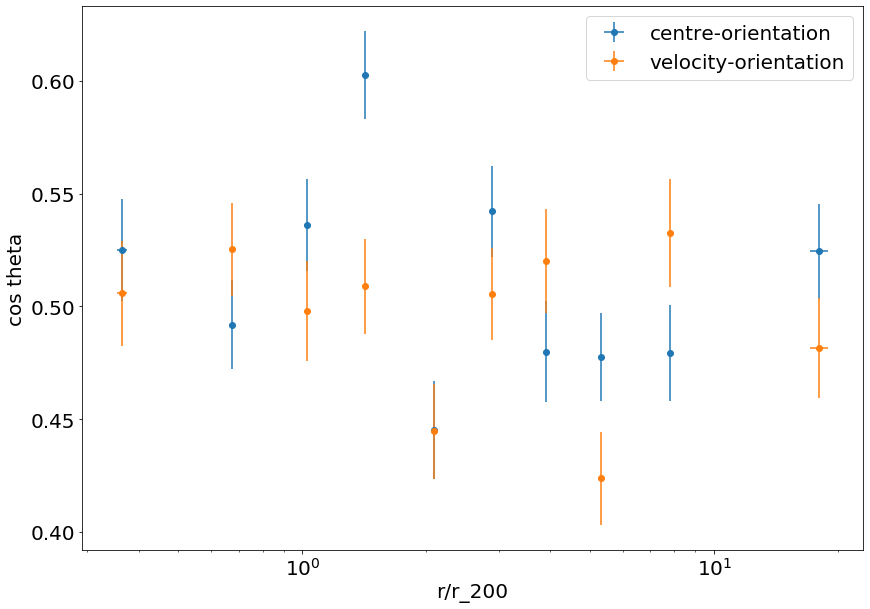

In [51]:
pl.figure(figsize=(14, 10))

pl.errorbar(xdist, medC, yerr=errC, xerr=errX, marker='o', ls=' ', label='centre-orientation')
pl.errorbar(xdist, medV, yerr=errV, xerr=errX, marker='o', ls=' ', label='velocity-orientation')

pl.xscale('log')

pl.legend(loc='best')
pl.xlabel('r/r_200')
pl.ylabel('cos theta')

In [52]:
# maybe, maybe a little different, but firts lets test this thing
cosc, cosv, lzm, dist, zs, snaps = getTime(4470, 4469)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


In [53]:
# by "hand", for instance, the fifth one
gal = 4470
centre = 4469

uniqueID = int(128*1e6+gal)
stree = networkx.dfs_tree(trees, str(uniqueID))
mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
# and the centre
uniqueIDC = int(128*1e6+centre)
streeC = networkx.dfs_tree(trees, str(uniqueIDC))
mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))

mtree[10], mtreeC[10]

('118002194', '118002193')

In [54]:
gal = 2194
centre = 2193

offGas = sim['SnapNumber_118/SubGroups/PartType4/Offsets'][gal].astype('int')
RotMass = sim['SnapNumber_118/SubGroups/PartType4/RotationMatrix'][gal]

cenGas = sim['SnapNumber_118/SubGroups/SubGroupPos'][gal]
posgal = sim['SnapNumber_118/PartType4/Coordinates'][offGas[0]:offGas[1]]

RotI = np.linalg.inv(RotMass)
RotII = RotMass.T

R = np.array([0., 0., 1.])
R_rot = np.dot(RotI, R.T).T

# anyway, the diference with the centre and vel
velGal = sim['SnapNumber_118/SubGroups/SubGroupVel'][gal]
cenGro = sim['SnapNumber_118/SubGroups/SubGroupPos'][centre]
velGro = sim['SnapNumber_118/SubGroups/SubGroupVel'][centre]

vecCen = cenGro - cenGas
vecVel = velGal - velGro

vecCenN = vecCen/np.sqrt(np.sum(vecCen**2.))
vecVelN = vecVel/np.sqrt(np.sum(vecVel**2.))

# and cosines
cosCen = np.dot(R_rot, vecCenN)
cosVel = np.dot(R_rot, vecVelN)

In [55]:
cosCen, cosVel

(-0.4911187054794737, -0.7726418633596729)

In [56]:
cosc[10], cosv[10]

(-0.4911187054794736, -0.7726418633596728)

In [57]:
getAngles(4470, 4469)

<ipython-input-32-7f02deb14e7e>:26: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


(0.39997274169252445, -0.616386161160301, 0.593409752020417)

In [58]:
# and with respec to z, one by one first and then all by z.
cosc1, cosv1, lzm1, dist1, zs1, snaps1 = getTime(4338, 4337, number=1000)
cosc2, cosv2, lzm2, dist2, zs2, snaps2 = getTime(4341, 4337, number=1000)
cosc3, cosv3, lzm3, dist3, zs3, snaps3 = getTime(4470, 4469, number=1000)
cosc4, cosv4, lzm4, dist4, zs4, snaps4 = getTime(4474, 4469, number=1000)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


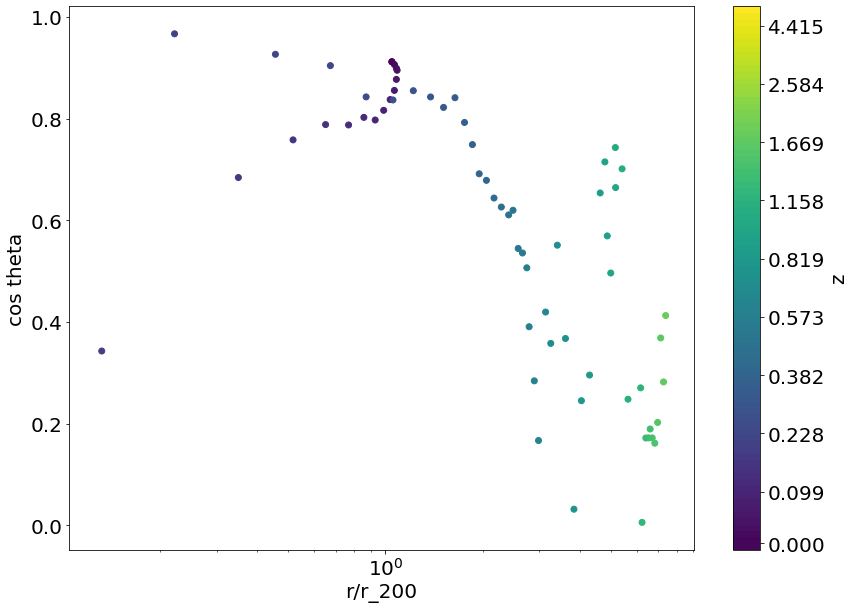

In [59]:
pl.figure(figsize=(14,10))

lens = [zs1.size, zs2.size, zs3.size, zs4.size]

mz = np.max(lens)

if mz==lens[0]:
    zval = zs1
elif mz==lens[1]:
    zval = zs2
elif mz==lens[2]:
    zval = zs3
else:
    zval = zs4

#papels = np.percentile(valorder_near, vaper)

norm = mpc.BoundaryNorm(boundaries=zval, ncolors=256)

pl.scatter(dist1, np.abs(cosc1), c=zs1, label='sub Group 4338', marker='o', norm=norm)
#pl.scatter(dist2, np.abs(cosc2), c=zs2, label='sub Group 4341', marker='o', norm=norm)
#pl.scatter(dist3, np.abs(cosc3), c=zs3, label='sub Group 4470', marker='o', norm=norm)
#pl.scatter(dist4, np.abs(cosc4), c=zs4, label='sub Group 4474', marker='o', norm=norm)

pl.xlabel('r/r_200')
pl.ylabel('cos theta')


pl.xscale('log')
#pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('z')

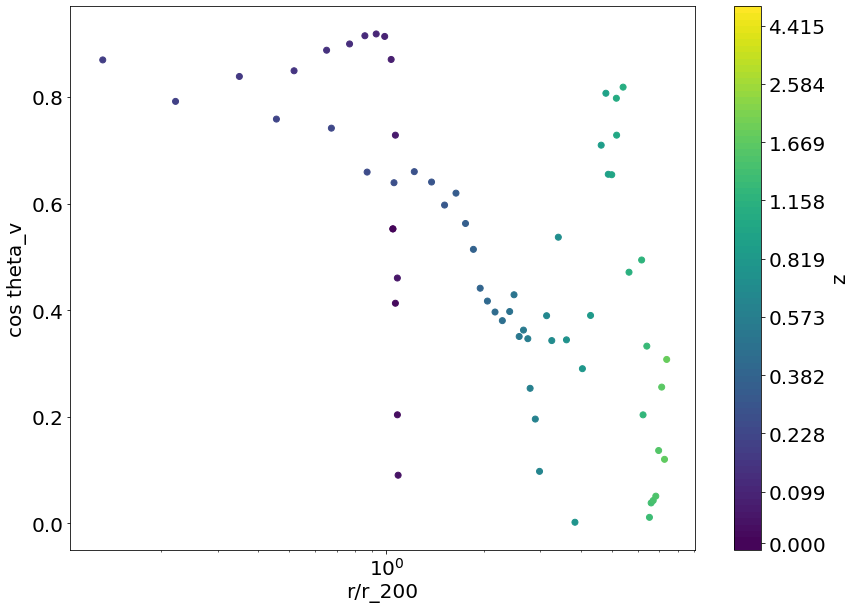

In [60]:
pl.figure(figsize=(14,10))

pl.scatter(np.abs(dist1), np.abs(cosv1), c=zs1, label='sub Group 4338', marker='o', norm=norm)
#pl.scatter(np.abs(dist2), np.abs(cosv2), c=zs2, label='sub Group 4341', marker='o', norm=norm)
#pl.scatter(np.abs(dist3), np.abs(cosv3), c=zs3, label='sub Group 4470', marker='o', norm=norm)
#pl.scatter(dist4, np.abs(cosv4), c=zs4, label='sub Group 4474', marker='o', norm=norm)

pl.xlabel('r/r_200')
pl.ylabel('cos theta_v')


pl.xscale('log')

bar = pl.colorbar()
bar.set_label('z')

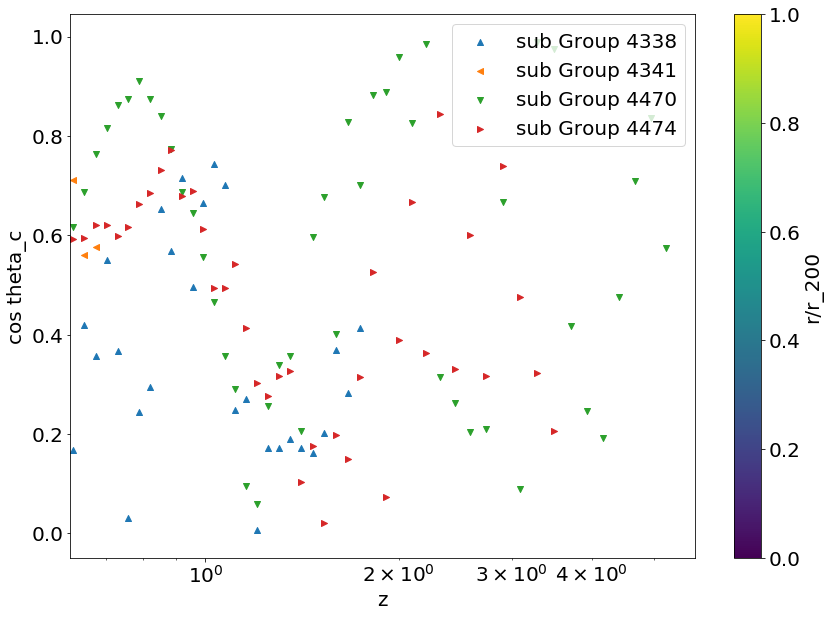

In [61]:
pl.figure(figsize=(14,10))

pl.scatter(zs1, np.abs(cosc1), label='sub Group 4338', marker='^', norm=mpc.LogNorm())
pl.scatter(zs2, np.abs(cosc2), label='sub Group 4341', marker='<', norm=mpc.LogNorm())
pl.scatter(zs3, np.abs(cosc3), label='sub Group 4470', marker='v', norm=mpc.LogNorm())
pl.scatter(zs4, np.abs(cosc4), label='sub Group 4474', marker='>', norm=mpc.LogNorm())

pl.xlabel('z')
pl.ylabel('cos theta_c')

pl.xscale('log')
pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('r/r_200')

In [62]:
pers = np.linspace(0, 100, 11)
stepsz = np.percentile(Z, pers)

In [63]:
medC, crap1, crap2 = sps.binned_statistic(Z, COSC, statistic='median', bins=stepsz)
medV, crap1, crap2 = sps.binned_statistic(Z, COSV, statistic='median', bins=stepsz)
xdist, crap1, crap2 = sps.binned_statistic(Z, DIST, statistic='median', bins=stepsz)
number, crap1, crap2 = sps.binned_statistic(Z, COSV, statistic='count', bins=stepsz)

stdC, crap1, crap2 = sps.binned_statistic(Z, COSC, statistic='std', bins=stepsz)
stdV, crap1, crap2 = sps.binned_statistic(Z, COSV, statistic='std', bins=stepsz)
stddist, crap1, crap2 = sps.binned_statistic(Z, DIST, statistic='std', bins=stepsz)

errC = stdC/np.sqrt(number)*np.sqrt(np.pi/2.)
errV = stdV/np.sqrt(number)*np.sqrt(np.pi/2.)
errX = stddist/np.sqrt(number)*np.sqrt(np.pi/2.)

Text(0, 0.5, 'cos theta')

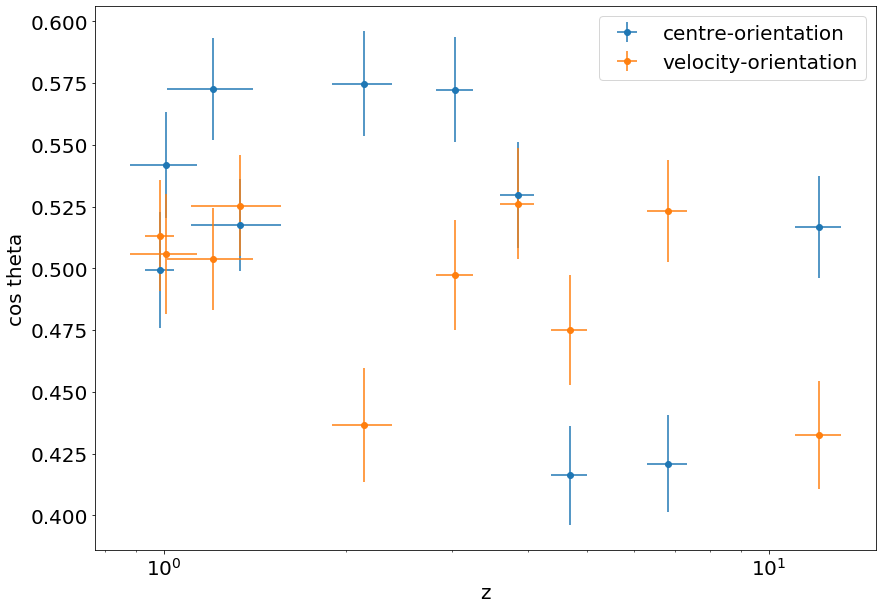

In [64]:
pl.figure(figsize=(14, 10))

pl.errorbar(xdist, medC, yerr=errC, xerr=errX, marker='o', ls=' ', label='centre-orientation')
pl.errorbar(xdist, medV, yerr=errV, xerr=errX, marker='o', ls=' ', label='velocity-orientation')

pl.xscale('log')

pl.legend(loc='best')
pl.xlabel('z')
pl.ylabel('cos theta')

In [65]:
# I need radius to this things
raddd = []

for ss, cc in zip(Satsurv, Centsurv):
    cenGal = sim['SnapNumber_128/SubGroups/SubGroupPos'][ss]
    cenBGG = sim['SnapNumber_128/SubGroups/SubGroupPos'][cc]
    
    grou = sim['SnapNumber_128/SubGroups/GroupNumber'][cc]
    R200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][grou]
    
    dist = cenGal-cenBGG
    dd = np.sqrt(np.sum(dist**2.))
    dd = dd/R200
    
    raddd.append(dd)
    
raddd = np.array(raddd)

In [66]:
raddd.size

94

In [67]:
ii = np.where(raddd>0.5)
ii[0].size

77

In [68]:
CosCenR = CosCen[ii]
CosVelR = CosVel[ii]
LZMR = LZM[ii]
SatsurvR = Satsurv[ii]
CentsurvR = Centsurv[ii]

Text(0, 0.5, 'number of galaxies')

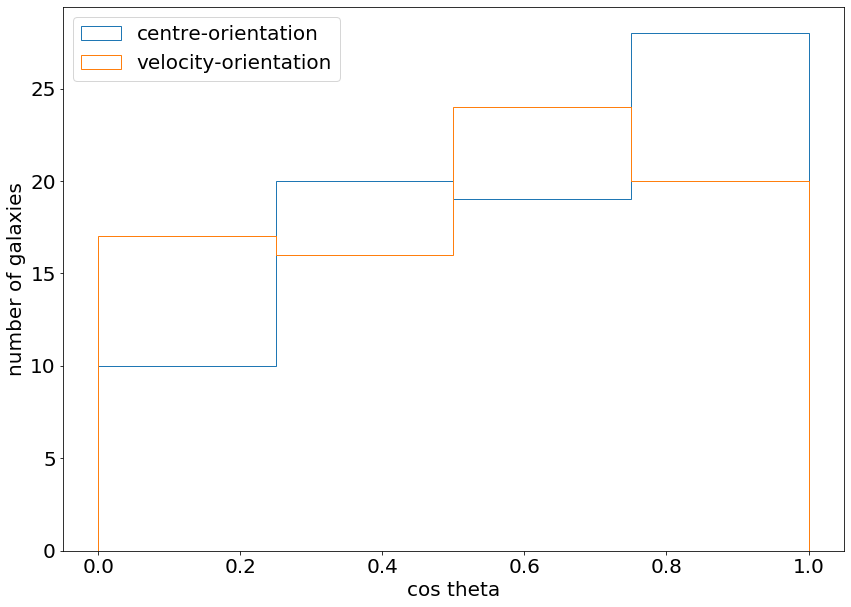

In [69]:
pl.figure(figsize=(14, 10))

pl.hist(np.abs(CosCenR), label='centre-orientation', histtype='step', range=(0,1.), bins=4)
pl.hist(np.abs(CosVelR), label='velocity-orientation', histtype='step', range=(0,1.), bins=4)

pl.legend(loc=2)
pl.xlabel('cos theta')
pl.ylabel('number of galaxies')

Text(0, 0.5, 'normalized density')

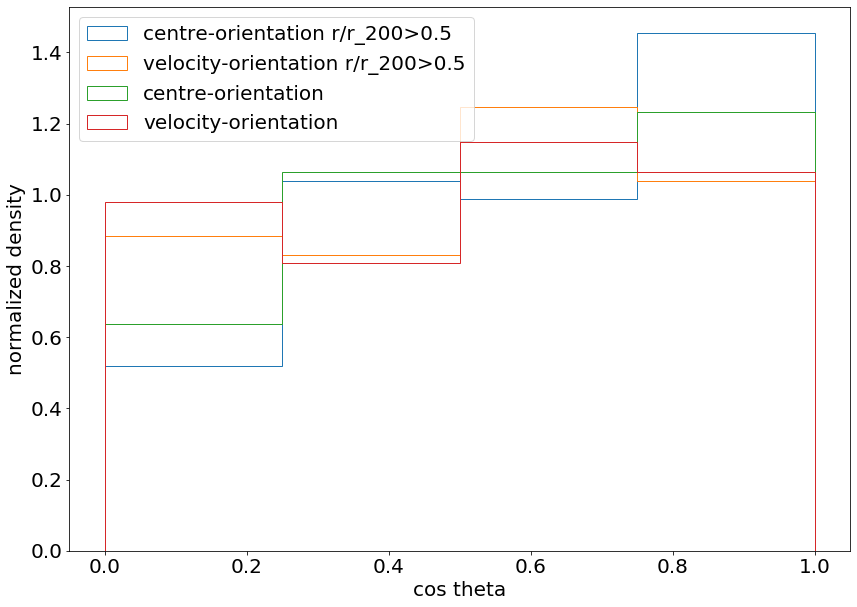

In [70]:
pl.figure(figsize=(14, 10))

pl.hist(np.abs(CosCenR), label='centre-orientation r/r_200>0.5', histtype='step', range=(0,1.), bins=4, density=True)
pl.hist(np.abs(CosVelR), label='velocity-orientation r/r_200>0.5', histtype='step', range=(0,1.), bins=4, density=True)

pl.hist(np.abs(CosCen), label='centre-orientation', histtype='step', range=(0,1.), bins=4, density=True)
pl.hist(np.abs(CosVel), label='velocity-orientation', histtype='step', range=(0,1.), bins=4, density=True)

pl.legend(loc=2)
pl.xlabel('cos theta')
pl.ylabel('normalized density')

In [71]:
# and by putting size by lost gas mass

def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

def get_main_branch_and_progNumb(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    numb = [[node], ]
    i = 0
    while True:
        successors = list(subtree.successors(node))
        if len(successors) == 0:
            break
        node = successors[0] # select only the first succesor (main branch)
        mpb.append(node)
        numb.append(successors)
        
    return mpb, numb


def set_view(figure, framenr, fraction):
    ipv.view(fraction*360, 0.)
    
def set_angles(fig, i, fraction):
    fig.angley = fraction*np.pi*2

# a bunch of constants
UnitMass_in_g = 1.989e+43
UnitTime_in_s = 3.08568e+16
UnitVelocity_in_cm_per_s = 100000
UnitDensity_in_cgs = 6.7699e-22
UnitEnergy_in_cgs = 1.989e+53
GAMMA_MINUS1 = 2./3.
PROTONMASS = 1.6726e-24
BOLTZMANN = 1.3806e-16    

def tempFromMass(Mass, Abund, IE, ne1):
    XH = Abund[:,6]/Mass
    yHelium = (1. - XH)/(4.*XH)
    mu = (1 + 4.* yHelium)/ (1.+ yHelium + ne1 )
    temp = GAMMA_MINUS1 * IE * mu * 1.6726 / 1.3806 * 1.e-8 # / BOLTZMANN  * PROTONMASS
    temp = temp * 1e10 #   UnitEnergy_in_cgs / UnitMass_in_g;
    return temp



def plotPhaseSpace(fofID, centralID):
    uniqueID = int(128*1e6+fofID)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree, numbs = get_main_branch_and_progNumb(stree, str(uniqueID))
    
    uniqueC = int(128*1e6+centralID)
    streeC = networkx.dfs_tree(trees, str(uniqueC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueC))
    
    # find all the particleIDs that once belong to the subgroup
#     Idlist, vallist, valcen = [], [], []
    Idlist, vallist = [], []
    
    for mm, mmC in zip(mtree[1:], mtreeC[1:]): # ignore the first one
        snap, idd = split_unique_id(int(mm))
        snapC, iddC = split_unique_id(int(mmC))
        tempOff = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snap)][idd].astype('int')
        pgal = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][idd]
        if snapC==snap:
            pcen = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snapC)][iddC]
        if tempOff[0]>= 0 and tempOff[1]>=0:
            tempIds = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snap)][tempOff[0]:tempOff[1]]
            Idlist.extend(list(tempIds))
            # calcule the value for color coding the graph
            #val = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
            val = snap # eso
            #IE = sim['SnapNumber_{}/PartType0/InternalEnergy'.format(snap)][tempOff[0]:tempOff[1]]
            #Mass = sim['SnapNumber_{}/PartType0/Masses'.format(snap)][tempOff[0]:tempOff[1]]
            #Abund = sim['SnapNumber_{}/PartType0/Abundances'.format(snap)][tempOff[0]:tempOff[1]]
            #ne1 = sim['SnapNumber_{}/PartType0/ElectronAbundance'.format(snap)][tempOff[0]:tempOff[1]]
            #val = tempFromMass(Mass, Abund, IE, ne1)
            #val = sim['SnapNumber_{}/PartType0/BindingEnergy'.format(snap)][tempOff[0]:tempOff[1]]
            #val, othi = getAnglesTime(idd, iddC, snap)
            #othi, val = getAnglesTime(idd, iddC, snap)
            #val = np.abs(val)
            #L = sim['SnapNumber_{}/PartType0/SpecificAngularMomentum'.format(snap)][tempOff[0]:tempOff[1]]
            #Lt = np.sqrt(L[:,0]**2+L[:,1]**2+L[:,2]**2)
            #val = L[:,2]/Lt # Lz
            #return None
            # if val is one for each particles just append, otherwise do the next
            vallist.extend([val]*tempIds.size)
            # or
            #vallist.extend(list(val))

    Idlist, vallist = np.array(Idlist), np.array(vallist)
    Idlist, Idunique = np.unique(Idlist, return_index=True) # remove duplicates
    vallist = vallist[Idunique]

    # the total list of particles that once belong to a give subgroup, lest see where are today.
    TdayOff = sim['SnapNumber_128/SubGroups/PartType0/Offsets'][fofID].astype('int')
    TdayCoord = sim['SnapNumber_128/PartType0/Coordinates'][TdayOff[0]:TdayOff[1]]

    TdayTotalIDs = sim['SnapNumber_128/PartType0/ParticleIDs'][()]
    
    IndexToday = np.in1d(TdayTotalIDs, Idlist)
    IndexToday_ = np.where(IndexToday)[0]
    
    #remove the ones that are not part of the group today.
    TdayIDs = sim['SnapNumber_128/PartType0/ParticleIDs'][TdayOff[0]:TdayOff[1]]

    IndexNot = np.in1d(Idlist, TdayIDs)
    IdNot = Idlist[np.where(IndexNot==False)[0]]

    IndexT = np.in1d(TdayTotalIDs, IdNot)
    IndexT_ = np.where(IndexT)[0]
    LostCoord = sim['SnapNumber_128/PartType0/Coordinates'][IndexT_]
    
    # ... and the redshift
    SurvIds_ = TdayTotalIDs[IndexT_]
    iidex = np.in1d(Idlist, SurvIds_)
    iidex_ = np.where(iidex)[0]
    vallist_, Idlist_ = vallist[iidex_], Idlist[iidex_]

    is1 = np.argsort(SurvIds_) # the target
    is2 = np.argsort(Idlist_)

    valorder = np.zeros(IndexT_.size)
    valorder[is1] = vallist_[is2]
    
    #now lets cut at  a certain distance
    distance = 600 # distance in ckpc

    posGal = sim['SnapNumber_128/SubGroups/SubGroupPos'][fofID]
    posCen = sim['SnapNumber_128/SubGroups/SubGroupPos'][centralID]

    dx, dy, dz = LostCoord[:,0]-posGal[0], LostCoord[:,1]-posGal[1], LostCoord[:,2]-posGal[2]
    distToC = np.sqrt(dx**2+dy**2+dz**2)

    icut = np.where(distToC<distance)[0]
    IndexT_near = IndexT_[icut]
    valorder_near = valorder[icut]
    #IndexT_near = IndexT_
    #valorder_near = valorder
    
    #NearCoord = sim['SnapNumber_128/PartType0/Coordinates'][IndexT_near]
    #NearVel = sim['SnapNumber_128/PartType0/Velocities'][IndexT_near]
    NearMass = sim['SnapNumber_128/PartType0/Masses'][IndexT_near]
    
    # here i make the cut.
    return NearMass, valorder_near

In [72]:
def getTime_withMass(ff, cc, number=100):
    uniqueID = int(128*1e6+ff)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    # and the centre
    uniqueIDC = int(128*1e6+cc)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    cosC, cosV, LZ, dist = [], [], [], []
    z, snaplist, mass = [], [], []
    
    LostMasses, snapMasses = plotPhaseSpace(ff, cc) # all masses at all z.
    
    for mm, mmC in zip(mtree, mtreeC):
        snap, ffT = split_unique_id(int(mm))
        snapC, ccT = split_unique_id(int(mmC))
        if snap==snapC:
            Off = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][ffT].astype('int')
            Np = Off[1]-Off[0]
            if Np>number:
                # and masses
                imasses = np.where(snapMasses==snap)
                ThisMasses = LostMasses[imasses]
                sMass = np.sum(ThisMasses)
                mass.append(sMass)
                
                cosCt, cosVt, LzT, distT = getAnglesTime(ffT, ccT, snap)
                cosC.append(cosCt)
                cosV.append(cosVt)
                LZ.append(LzT)
                dist.append(distT)
                zi = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
                z.append(zi)
                snaplist.append(snap)

    cosC, cosV, LZ, dist = np.array(cosC), np.array(cosV), np.array(LZ), np.array(dist)
    z, snaplist = np.array(z), np.array(snaplist)
    mass = np.array(mass)
    
    return cosC, cosV, LZ, dist, z, snaplist, mass

In [73]:
# and with respec to z, one by one first and then all by z.
cosc1, cosv1, lzm1, dist1, zs1, snaps1, mass1 = getTime_withMass(4338, 4337, number=1000)
cosc2, cosv2, lzm2, dist2, zs2, snaps2, mass2 = getTime_withMass(4341, 4337, number=1000)
cosc3, cosv3, lzm3, dist3, zs3, snaps3, mass3 = getTime_withMass(4470, 4469, number=1000)
cosc4, cosv4, lzm4, dist4, zs4, snaps4, mass4 = getTime_withMass(4474, 4469, number=1000)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


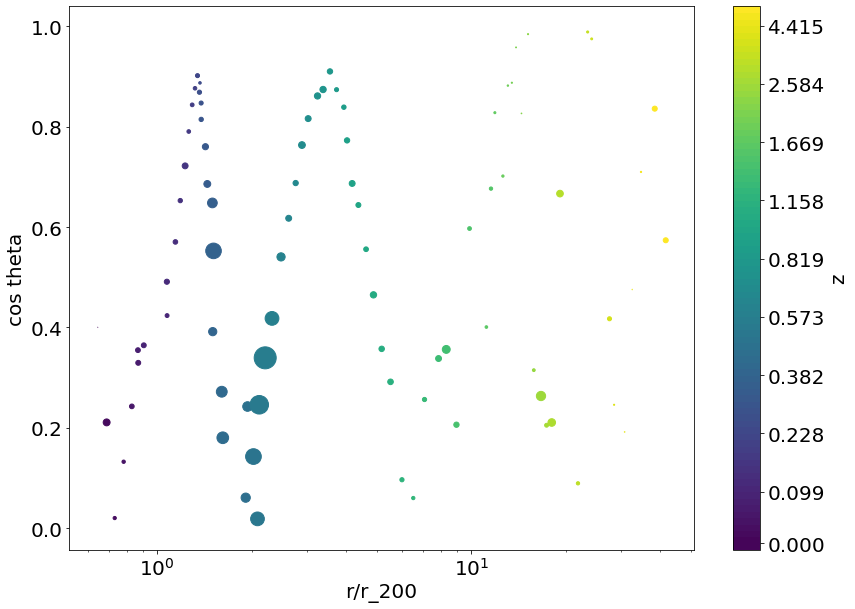

In [74]:
pl.figure(figsize=(14,10))

lens = [zs1.size, zs2.size, zs3.size, zs4.size]

mz = np.max(lens)

if mz==lens[0]:
    zval = zs1
elif mz==lens[1]:
    zval = zs2
elif mz==lens[2]:
    zval = zs3
else:
    zval = zs4

#papels = np.percentile(valorder_near, vaper)

norm = mpc.BoundaryNorm(boundaries=zval, ncolors=256)

#pl.scatter(dist1, np.abs(cosc1), c=zs1, label='sub Group 4338', marker='o', norm=norm, s=mass1*1000)
#pl.scatter(dist2, np.abs(cosc2), c=zs2, label='sub Group 4341', marker='o', norm=norm, s=mass2*5000)
pl.scatter(dist3, np.abs(cosc3), c=zs3, label='sub Group 4470', marker='o', norm=norm, s=mass3*5000)
#pl.scatter(dist4, np.abs(cosc4), c=zs4, label='sub Group 4474', marker='o', norm=norm, s=mass4*5000)

pl.xlabel('r/r_200')
pl.ylabel('cos theta')


pl.xscale('log')
#pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('z')

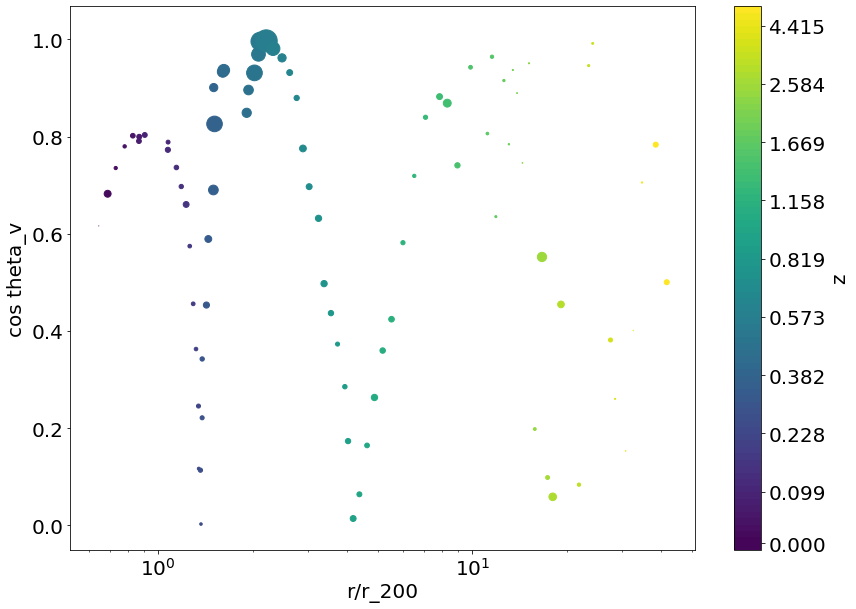

In [75]:
pl.figure(figsize=(14,10))

#pl.scatter(np.abs(dist1), np.abs(cosv1), c=zs1, label='sub Group 4338', marker='o', norm=norm, s=mass1*1000)
#pl.scatter(np.abs(dist2), np.abs(cosv2), c=zs2, label='sub Group 4341', marker='o', norm=norm, s= mass2*5000)
pl.scatter(np.abs(dist3), np.abs(cosv3), c=zs3, label='sub Group 4470', marker='o', norm=norm, s= mass3*5000)
#pl.scatter(dist4, np.abs(cosv4), c=zs4, label='sub Group 4474', marker='o', norm=norm, s=mass4*5000)

pl.xlabel('r/r_200')
pl.ylabel('cos theta_v')


pl.xscale('log')

bar = pl.colorbar()
bar.set_label('z')

In [76]:
# and now lets take into account the time variation, lets see.

def getAnglesTime_Z(gal, centre, snap):
    offGas = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][gal].astype('int')
    RotMass = sim['SnapNumber_{}/SubGroups/PartType4/RotationMatrix'.format(snap)][gal]
    cenGas = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][gal]
    RotII = RotMass.T
    R = np.array([0., 0., 1.])
    R_rot = np.dot(RotII, R.T).T
    
    velGal = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][gal]
    cenGro = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][centre]
    velGro = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][centre]
    
    vecCen = cenGro - cenGas
    vecVel = velGal - velGro
    
    sep = np.sqrt(np.sum(vecCen**2))
    
    gro = sim['SnapNumber_{}/SubGroups/GroupNumber'.format(snap)][centre]
    R200 = sim['SnapNumber_{}/Groups/Group_R_Crit200'.format(snap)][gro]
    
    sepr200 = sep/R200
    
    vecCenN = np.array([0.,0.,1.])
    vecVelN = vecVel/np.sqrt(np.sum(vecVel**2.))
    
    # and cosines
    cosCen = np.dot(R_rot, vecCenN)
    cosVel = np.dot(R_rot, vecVelN)
    
    Ls = sim['SnapNumber_{}/PartType4/SpecificAngularMomentum'.format(snap)][offGas[0]:offGas[1]]
    Lz = Ls[:,2]
    L = np.sqrt(Ls[:,0]**2+Ls[:,1]**2+Ls[:,2]**2)
    LzL = Lz/L
    
    ii = np.where(np.isnan(LzL)==False)
    LzL = LzL[ii]
    
    LzM = np.mean(LzL)
    
    return cosCen, cosVel, LzM, sepr200

def getTime_Z(ff, cc, number=100):
    uniqueID = int(128*1e6+ff)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    # and the centre
    uniqueIDC = int(128*1e6+cc)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    cosC, cosV, LZ, dist = [], [], [], []
    z, snaplist = [], []
    
    for mm, mmC in zip(mtree, mtreeC):
        snap, ffT = split_unique_id(int(mm))
        snapC, ccT = split_unique_id(int(mmC))
        if snap==snapC:
            Off = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][ffT].astype('int')
            Np = Off[1]-Off[0]
            if Np>number:
            
                cosCt, cosVt, LzT, distT = getAnglesTime_Z(ffT, ccT, snap)
            
                cosC.append(cosCt)
                cosV.append(cosVt)
                LZ.append(LzT)
                dist.append(distT)
                zi = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
                z.append(zi)
                snaplist.append(snap)

    cosC, cosV, LZ, dist = np.array(cosC), np.array(cosV), np.array(LZ), np.array(dist)
    z, snaplist = np.array(z), np.array(snaplist)
    
    return cosC, cosV, LZ, dist, z, snaplist

In [77]:
# and with respec to z, one by one first and then all by z.
cosZ1, cosv1, lzm1, dist1, zs1, snaps1 = getTime_Z(4338, 4337, number=1000)
cosZ2, cosv2, lzm2, dist2, zs2, snaps2 = getTime_Z(4341, 4337, number=1000)
cosZ3, cosv3, lzm3, dist3, zs3, snaps3 = getTime_Z(4470, 4469, number=1000)
cosZ4, cosv4, lzm4, dist4, zs4, snaps4 = getTime_Z(4474, 4469, number=1000)

<ipython-input-76-87b3767fa767>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


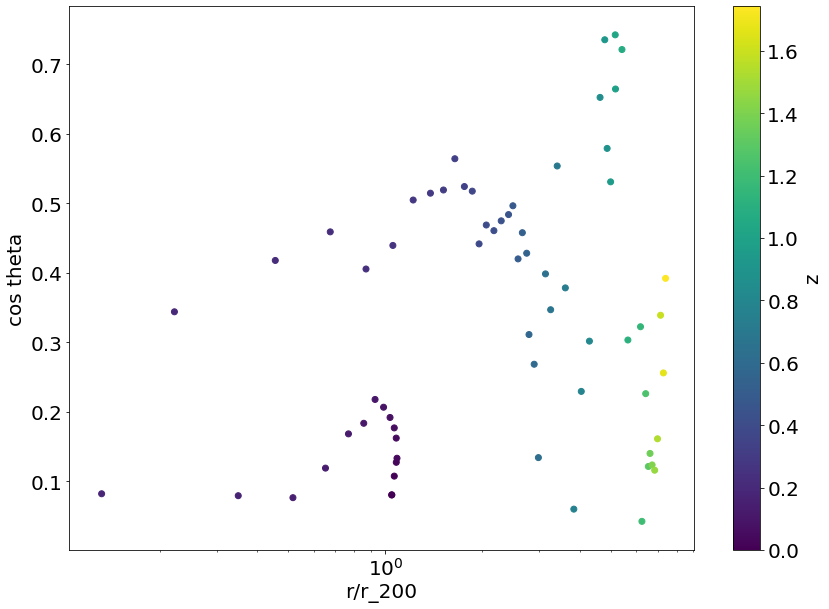

In [78]:
pl.figure(figsize=(14,10))

lens = [zs1.size, zs2.size, zs3.size, zs4.size]

mz = np.max(lens)

if mz==lens[0]:
    zval = zs1
elif mz==lens[1]:
    zval = zs2
elif mz==lens[2]:
    zval = zs3
else:
    zval = zs4

#papels = np.percentile(valorder_near, vaper)

norm = mpc.BoundaryNorm(boundaries=zval, ncolors=256)

pl.scatter(dist1, np.abs(cosZ1), c=zs1, label='sub Group 4338', marker='o')
#pl.scatter(dist2, np.abs(cosZ2), c=zs2, label='sub Group 4341', marker='o')
#pl.scatter(dist3, np.abs(cosZ3), c=zs3, label='sub Group 4470', marker='o')
#pl.scatter(dist4, np.abs(cosZ4), c=zs4, label='sub Group 4474', marker='o')

pl.xlabel('r/r_200')
pl.ylabel('cos theta')


pl.xscale('log')
#pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('z')

In [79]:
# ok, lets add time to this, but firts i need to understand time, and decide a time frame

sim['SnapNumber_128/Header/OmegaLambda'].attrs['description']

' The cosmological density parameter for the cosmological constant'

In [80]:
sim['SnapNumber_100/Header/'].keys()

<KeysViewHDF5 ['BoxSize', 'HubbleParam', 'MassTable', 'Omega0', 'OmegaLambda', 'Redshift', 'Time']>

In [81]:
import astropy.cosmology as apc

In [82]:
OmegaM = sim['SnapNumber_128/Header/Omega0'][()]
OmegaL = sim['SnapNumber_128/Header/OmegaLambda'][()]

OmegaM, OmegaL, OmegaM+OmegaL

(0.3175, 0.6825, 1.0)

In [83]:
Cosmo = apc.FlatLambdaCDM(H0=100, Om0=OmegaM) # H0 = 100, so all quantities are in h or /h

In [84]:
# so, for instance
ltime1 = Cosmo.lookback_time(zs1).value

In [85]:
ltime1

array([1.77635684e-15, 1.77635684e-15, 1.12770636e-01, 2.25406927e-01,
       3.37906562e-01, 4.50267207e-01, 5.62486400e-01, 6.74561895e-01,
       7.86491174e-01, 8.98272012e-01, 1.00990206e+00, 1.12137903e+00,
       1.23270051e+00, 1.34386433e+00, 1.45486825e+00, 1.56571011e+00,
       1.67638765e+00, 1.78689890e+00, 1.89724174e+00, 2.00741404e+00,
       2.11741398e+00, 2.22723968e+00, 2.33688914e+00, 2.44636077e+00,
       2.55565273e+00, 2.66476345e+00, 2.77369139e+00, 2.88243512e+00,
       2.99099320e+00, 3.09936446e+00, 3.20754761e+00, 3.31554168e+00,
       3.42334562e+00, 3.53095866e+00, 3.63838003e+00, 3.74560911e+00,
       3.85264544e+00, 3.95948861e+00, 4.06613842e+00, 4.17259475e+00,
       4.27885772e+00, 4.38492746e+00, 4.49080434e+00, 4.59648890e+00,
       4.70198164e+00, 4.80728349e+00, 4.91239537e+00, 5.01731845e+00,
       5.12205394e+00, 5.22660332e+00, 5.33096821e+00, 5.43515045e+00,
       5.53915190e+00, 5.64297481e+00, 5.74662138e+00, 5.85009415e+00,
      

In [86]:
# adn now we need to find the index closer to the time where tha galaxy was at certain virial radius for the first time
def getVirZ(z, dist, distat=2):
    i1 = np.where(dist<distat)
    zin = z[i1]
    zenter = zin.max() # yeap, this is
    tenter = Cosmo.lookback_time(zenter).value
    return zenter, tenter

In [87]:
zin1, tin1 = getVirZ(zs1, dist1, distat=2)

In [88]:
time1 = tin1 - ltime1

In [89]:
time1

array([ 2.88243512,  2.88243512,  2.76966448,  2.65702819,  2.54452856,
        2.43216791,  2.31994872,  2.20787322,  2.09594394,  1.98416311,
        1.87253306,  1.76105608,  1.64973461,  1.53857079,  1.42756687,
        1.31672501,  1.20604747,  1.09553622,  0.98519337,  0.87502107,
        0.76502114,  0.65519543,  0.54554598,  0.43607435,  0.32678239,
        0.21767167,  0.10874373,  0.        , -0.10855809, -0.21692934,
       -0.32511249, -0.43310656, -0.5409105 , -0.64852354, -0.75594492,
       -0.863174  , -0.97021032, -1.07705349, -1.1837033 , -1.29015963,
       -1.39642261, -1.50249234, -1.60836922, -1.71405378, -1.81954652,
       -1.92484837, -2.02996026, -2.13488334, -2.23961882, -2.3441682 ,
       -2.44853309, -2.55271534, -2.65671679, -2.76053969, -2.86418626,
       -2.96765903, -3.07096063, -3.17409384, -3.27706166, -3.3798673 ,
       -3.48251405, -3.58500538, -3.68734498, -3.78953671, -3.89158448])

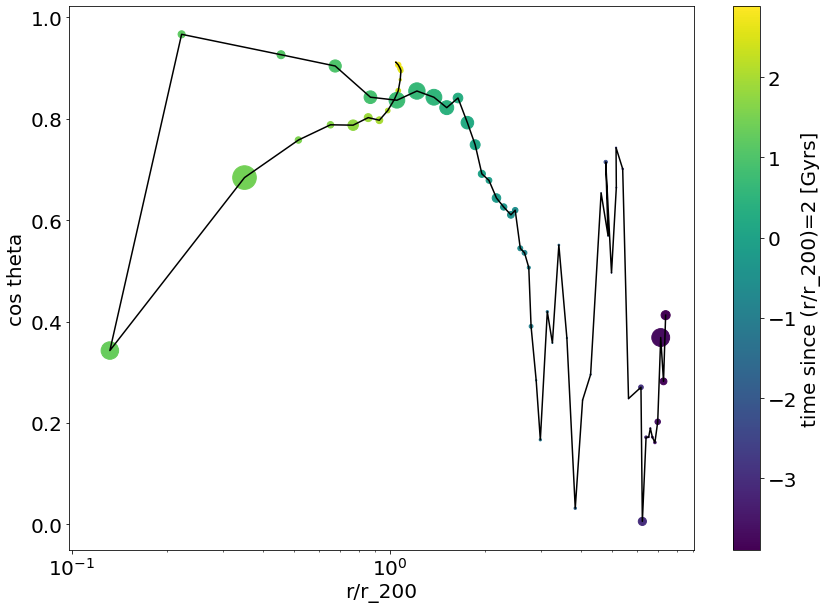

In [90]:
pl.figure(figsize=(14,10))

pl.scatter(dist1, np.abs(cosc1), c=time1, label='sub Group 4338', marker='o', s=mass1*10000)
pl.plot(dist1, np.abs(cosc1), c='black')

#pl.scatter(dist2, np.abs(cosc2), c=zs2, label='sub Group 4341', marker='o', s=mass2*5000)
#pl.scatter(dist3, np.abs(cosc3), c=zs3, label='sub Group 4470', marker='o', s=mass3*5000)
#pl.scatter(dist4, np.abs(cosc4), c=zs4, label='sub Group 4474', marker='o', s=mass4*5000)

pl.xlabel('r/r_200')
pl.ylabel('cos theta')

pl.xscale('log')
#pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('time since (r/r_200)=2 [Gyrs]')

In [91]:
# for all, then.
ltime2 = Cosmo.lookback_time(zs2).value
ltime3 = Cosmo.lookback_time(zs3).value
ltime4 = Cosmo.lookback_time(zs4).value

zin2, tin2 = getVirZ(zs2, dist2, distat=2)
zin3, tin3 = getVirZ(zs3, dist3, distat=2)
zin4, tin4 = getVirZ(zs4, dist4, distat=2)

time2 = tin2 - ltime2
time3 = tin3 - ltime3
time4 = tin4 - ltime4

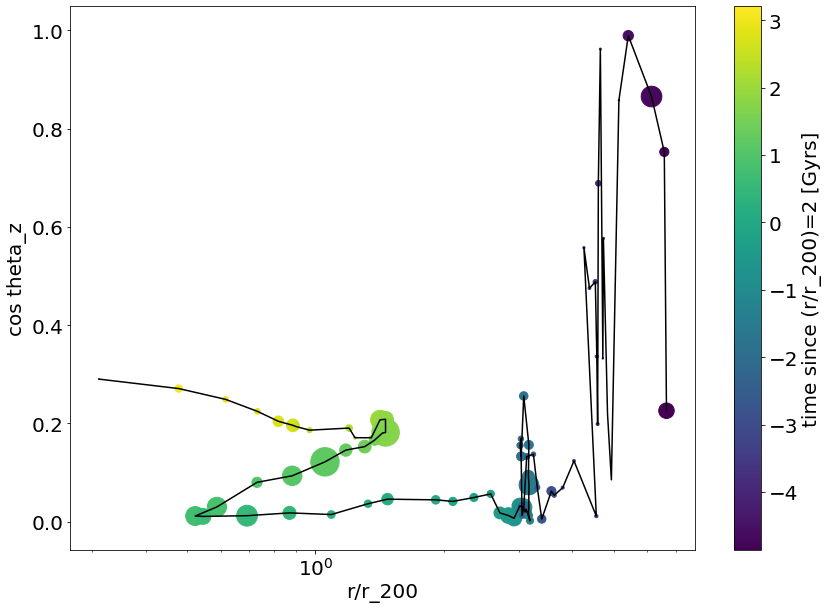

In [92]:
pl.figure(figsize=(14,10))

#pl.scatter(dist1, np.abs(cosZ1), c=time1, label='sub Group 4338', marker='o', s=mass1*10000)
#pl.plot(dist1, np.abs(cosZ1), c='black')

#pl.scatter(dist2, np.abs(cosZ2), c=time2, label='sub Group 4341', marker='o', s=mass2*50000)
#pl.plot(dist2, np.abs(cosZ2), c='black')

#pl.scatter(dist3, np.abs(cosZ3), c=time3, label='sub Group 4470', marker='o', s=mass3*10000)
#pl.plot(dist3, np.abs(cosZ3), c='black')

pl.scatter(dist4, np.abs(cosZ4), c=time4, label='sub Group 4474', marker='o', s=mass4*50000)
pl.plot(dist4, np.abs(cosZ4), c='black')

pl.xlabel('r/r_200')
pl.ylabel('cos theta_z')

pl.xscale('log')
#pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('time since (r/r_200)=2 [Gyrs]')

In [93]:
# ok ok ok, now separating the infall from the outfalls, lets see
def sepPosC_time(ff, cc, snap):
    velGal = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][ff]
    velCen = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][cc]
    
    posGal = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][ff]
    posCen = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][cc]
    
    velT = velCen - velGal
    cendD = posCen - posGal
    
    nVel = np.sqrt(velT[0]**2.+velT[1]**2.+velT[2]**2.)
    ncenD = np.sqrt(cendD[0]**2.+cendD[1]**2.+cendD[2]**2.)
    
    ndot = velT[0]*cendD[0] + velT[1]*cendD[1] + velT[2]*cendD[2]
    cosB = ndot/(nVel*ncenD)
    return cosB


def getTime_StayOrGo(ff, cc, number=100):
    uniqueID = int(128*1e6+ff)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    # and the centre
    uniqueIDC = int(128*1e6+cc)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    cosC, cosV, LZ, dist = [], [], [], []
    z, snaplist = [], []
    CosB = []
    
    for mm, mmC in zip(mtree, mtreeC):
        snap, ffT = split_unique_id(int(mm))
        snapC, ccT = split_unique_id(int(mmC))
        if snap==snapC:
            Off = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][ffT].astype('int')
            Np = Off[1]-Off[0]
            if Np>number:
                cosCt, cosVt, LzT, distT = getAnglesTime(ffT, ccT, snap)
                cosB = sepPosC_time(ffT, ccT, snap)
                cosC.append(cosCt)
                cosV.append(cosVt)
                CosB.append(cosB)
                LZ.append(LzT)
                dist.append(distT)
                zi = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
                z.append(zi)
                snaplist.append(snap)

    cosC, cosV, LZ, dist = np.array(cosC), np.array(cosV), np.array(LZ), np.array(dist)
    z, snaplist = np.array(z), np.array(snaplist)
    CosB = np.array(CosB)
    
    return cosC, cosV, LZ, dist, z, snaplist, CosB

In [120]:
# brute force test n2

COSC, COSV, LZ, DIST, Z, SNAPS, COSB = [], [], [], [], [], [], []

pbar = progressbar.ProgressBar(max_value=sats.size)

c = 0
for ss, cc in zip(sats, cent):
    cosc, cosv, lzm, dist, zs, snaps, cosB = getTime_StayOrGo(ss, cc, number=100)
    ii = np.where(np.isnan(cosc)==False)
    if ii[0].size>0:
        COSC.extend(list(cosc[ii]))
        COSV.extend(list(cosv[ii]))
        LZ.extend(list(lzm[ii]))
        DIST.extend(list(dist[ii]))
        Z.extend(list(zs[ii]))
        SNAPS.extend(list(snaps[ii]))
        COSB.extend(list(cosB[ii]))
    c += 1
    pbar.update(c)
    
COSC, COSV, LZ, DIST = np.array(COSC), np.array(COSV), np.array(LZ), np.array(DIST)
COSC, COSV = np.abs(COSC), np.abs(COSV)
Z, SNAPS = np.array(Z), np.array(SNAPS)
COSB = np.array(COSB)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L
 98% (509 of 515) |##################### | Elapsed Time: 0:01:01 ETA:   0:00:00

In [121]:
i_up = np.where(COSB<0.)
i_down = np.where(COSB>0.) 

DIST_1, COSC_1, COSV_1, Z_1, SNAPS_1 = DIST[i_up], COSC[i_up], COSV[i_up], Z[i_up], SNAPS[i_up]
DIST_2, COSC_2, COSV_2, Z_2, SNAPS_2 = DIST[i_down], COSC[i_down], COSV[i_down], Z[i_down], SNAPS[i_down]


medC_1, crap1, crap2 = sps.binned_statistic(DIST_1, COSC_1, statistic='median', bins=steps)
medV_1, crap1, crap2 = sps.binned_statistic(DIST_1, COSV_1, statistic='median', bins=steps)
xdist_1, crap1, crap2 = sps.binned_statistic(DIST_1, DIST_1, statistic='median', bins=steps)
number_1, crap1, crap2 = sps.binned_statistic(DIST_1, COSV_1, statistic='count', bins=steps)

stdC_1, crap1, crap2 = sps.binned_statistic(DIST_1, COSC_1, statistic='std', bins=steps)
stdV_1, crap1, crap2 = sps.binned_statistic(DIST_1, COSV_1, statistic='std', bins=steps)
stddist_1, crap1, crap2 = sps.binned_statistic(DIST_1, DIST_1, statistic='std', bins=steps)

errC_1 = stdC_1/np.sqrt(number_1)*np.sqrt(np.pi/2.)
errV_1 = stdV_1/np.sqrt(number_1)*np.sqrt(np.pi/2.)
errX_1 = stddist_1/np.sqrt(number_1)*np.sqrt(np.pi/2.)

medC_2, crap1, crap2 = sps.binned_statistic(DIST_2, COSC_2, statistic='median', bins=steps)
medV_2, crap1, crap2 = sps.binned_statistic(DIST_2, COSV_2, statistic='median', bins=steps)
xdist_2, crap1, crap2 = sps.binned_statistic(DIST_2, DIST_2, statistic='median', bins=steps)
number_2, crap1, crap2 = sps.binned_statistic(DIST_2, COSV_2, statistic='count', bins=steps)

stdC_2, crap1, crap2 = sps.binned_statistic(DIST_2, COSC_2, statistic='std', bins=steps)
stdV_2, crap1, crap2 = sps.binned_statistic(DIST_2, COSV_2, statistic='std', bins=steps)
stddist_2, crap1, crap2 = sps.binned_statistic(DIST_2, DIST_2, statistic='std', bins=steps)

errC_2 = stdC_2/np.sqrt(number_2)*np.sqrt(np.pi/2.)
errV_2 = stdV_2/np.sqrt(number_2)*np.sqrt(np.pi/2.)
errX_2 = stddist_2/np.sqrt(number_2)*np.sqrt(np.pi/2.)

Text(0, 0.5, 'cos theta')

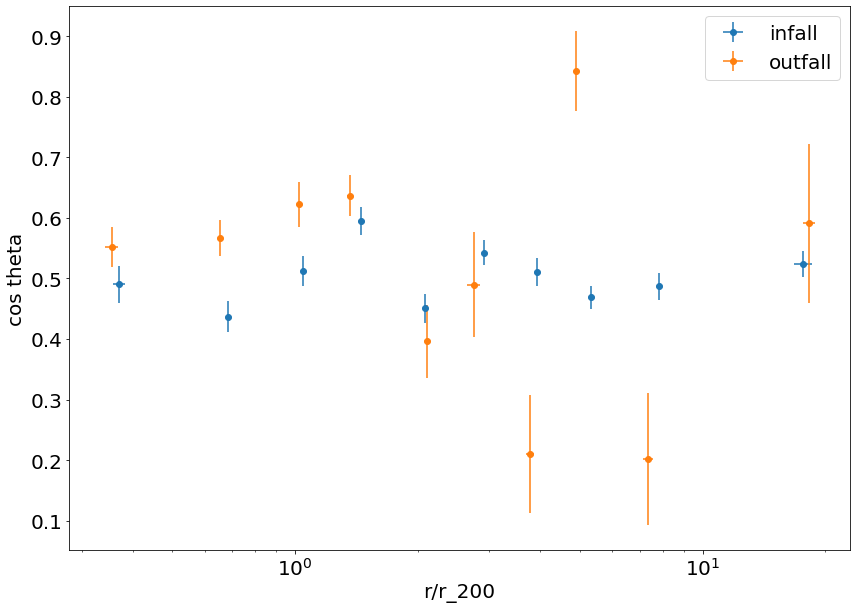

In [122]:
pl.figure(figsize=(14, 10))

pl.errorbar(xdist_1, medC_1, yerr=errC_1, xerr=errX_1, marker='o', ls=' ', label='infall')
pl.errorbar(xdist_2, medC_2, yerr=errC_2, xerr=errX_2, marker='o', ls=' ', label='outfall')

pl.xscale('log')

pl.legend(loc='best')
pl.xlabel('r/r_200')
pl.ylabel('cos theta')

Text(0, 0.5, 'cos theta_v')

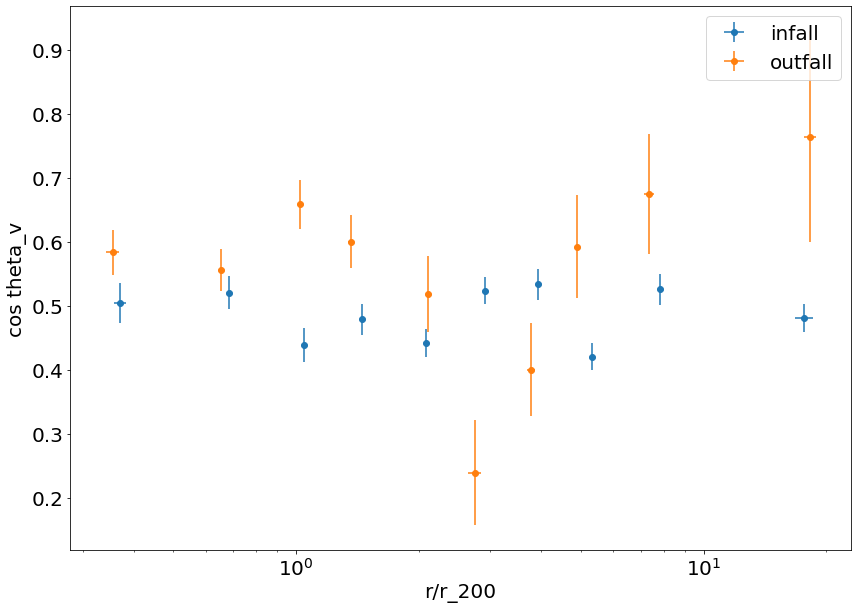

In [123]:
pl.figure(figsize=(14, 10))

pl.errorbar(xdist_1, medV_1, yerr=errV_1, xerr=errX_1, marker='o', ls=' ', label='infall')
pl.errorbar(xdist_2, medV_2, yerr=errV_2, xerr=errX_2, marker='o', ls=' ', label='outfall')

pl.xscale('log')

pl.legend(loc='best')
pl.xlabel('r/r_200')
pl.ylabel('cos theta_v')

In [124]:
pers = np.linspace(0, 100, 11)
stepsz = np.percentile(Z, pers)

In [125]:
medC_1, crap1, crap2 = sps.binned_statistic(Z_1, COSC_1, statistic='median', bins=stepsz)
medV_1, crap1, crap2 = sps.binned_statistic(Z_1, COSV_1, statistic='median', bins=stepsz)
xdist_1, crap1, crap2 = sps.binned_statistic(Z_1, DIST_1, statistic='median', bins=stepsz)
number_1, crap1, crap2 = sps.binned_statistic(Z_1, COSV_1, statistic='count', bins=stepsz)

stdC_1, crap1, crap2 = sps.binned_statistic(Z_1, COSC_1, statistic='std', bins=stepsz)
stdV_1, crap1, crap2 = sps.binned_statistic(Z_1, COSV_1, statistic='std', bins=stepsz)
stddist_1, crap1, crap2 = sps.binned_statistic(Z_1, DIST_1, statistic='std', bins=stepsz)

errC_1 = stdC_1/np.sqrt(number_1)*np.sqrt(np.pi/2.)
errV_1 = stdV_1/np.sqrt(number_1)*np.sqrt(np.pi/2.)
errX_1 = stddist_1/np.sqrt(number_1)*np.sqrt(np.pi/2.)

medC_2, crap1, crap2 = sps.binned_statistic(Z_2, COSC_2, statistic='median', bins=stepsz)
medV_2, crap1, crap2 = sps.binned_statistic(Z_2, COSV_2, statistic='median', bins=stepsz)
xdist_2, crap1, crap2 = sps.binned_statistic(Z_2, DIST_2, statistic='median', bins=stepsz)
number_2, crap1, crap2 = sps.binned_statistic(Z_2, COSV_2, statistic='count', bins=stepsz)

stdC_2, crap1, crap2 = sps.binned_statistic(Z_2, COSC_2, statistic='std', bins=stepsz)
stdV_2, crap1, crap2 = sps.binned_statistic(Z_2, COSV_2, statistic='std', bins=stepsz)
stddist_2, crap1, crap2 = sps.binned_statistic(Z_2, DIST_2, statistic='std', bins=stepsz)

errC_2 = stdC_2/np.sqrt(number_2)*np.sqrt(np.pi/2.)
errV_2 = stdV_2/np.sqrt(number_2)*np.sqrt(np.pi/2.)
errX_2 = stddist_2/np.sqrt(number_2)*np.sqrt(np.pi/2.)


Text(0, 0.5, 'cos theta')

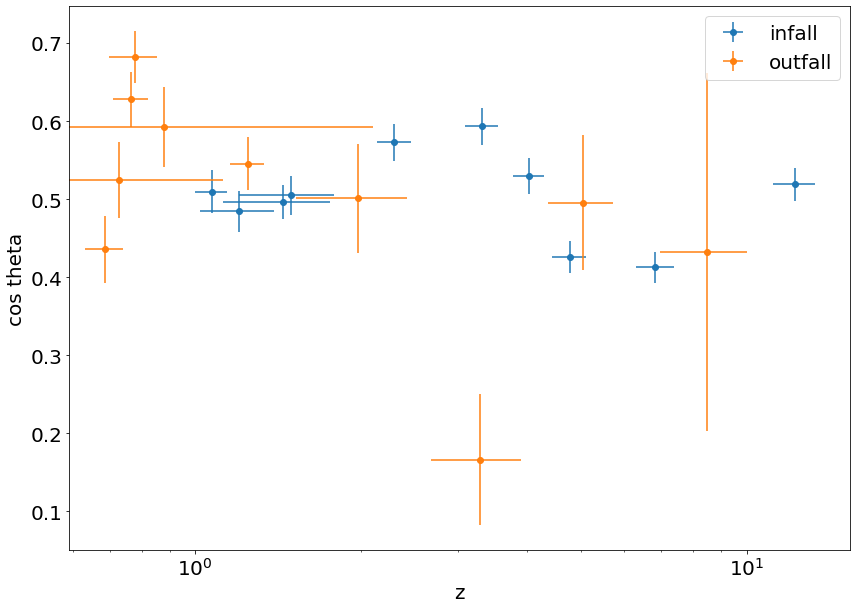

In [126]:
pl.figure(figsize=(14, 10))

pl.errorbar(xdist_1, medC_1, yerr=errC_1, xerr=errX_1, marker='o', ls=' ', label='infall')
pl.errorbar(xdist_2, medC_2, yerr=errC_2, xerr=errX_2, marker='o', ls=' ', label='outfall')

pl.xscale('log')

pl.legend(loc='best')
pl.xlabel('z')
pl.ylabel('cos theta')

Text(0, 0.5, 'cos theta_v')

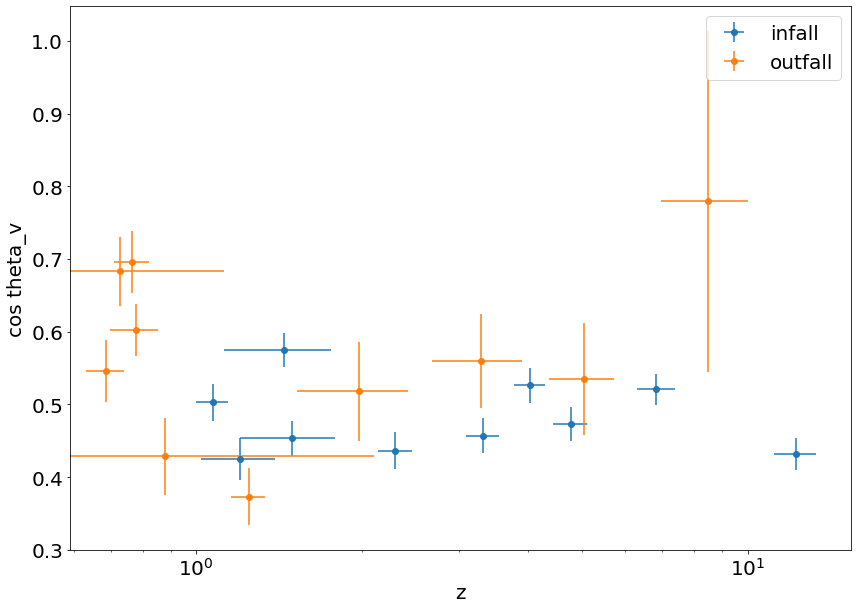

In [127]:
pl.figure(figsize=(14, 10))

pl.errorbar(xdist_1, medV_1, yerr=errV_1, xerr=errX_1, marker='o', ls=' ', label='infall')
pl.errorbar(xdist_2, medV_2, yerr=errV_2, xerr=errX_2, marker='o', ls=' ', label='outfall')

pl.xscale('log')

pl.legend(loc='best')
pl.xlabel('z')
pl.ylabel('cos theta_v')

In [102]:
cosc_i, cosv_i, lzm_i, dist_i, zs_i, snaps_i, cosB_i = getTime_StayOrGo(4338, 4337, number=1000)

<ipython-input-44-5e91ccba0407>:35: RuntimeWarning: invalid value encountered in true_divide
  LzL = Lz/L


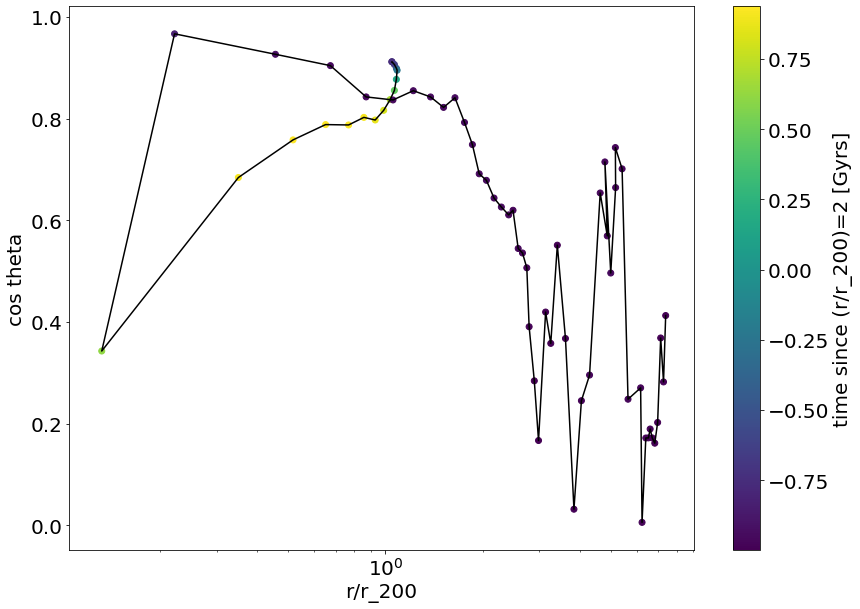

In [103]:
pl.figure(figsize=(14,10))

pl.scatter(dist_i, np.abs(cosc_i), c=cosB_i, label='sub Group 4338', marker='o')
pl.plot(dist_i, np.abs(cosc_i), c='black')

#pl.scatter(dist2, np.abs(cosc2), c=zs2, label='sub Group 4341', marker='o', s=mass2*5000)
#pl.scatter(dist3, np.abs(cosc3), c=zs3, label='sub Group 4470', marker='o', s=mass3*5000)
#pl.scatter(dist4, np.abs(cosc4), c=zs4, label='sub Group 4474', marker='o', s=mass4*5000)

pl.xlabel('r/r_200')
pl.ylabel('cos theta')

pl.xscale('log')
#pl.legend(loc='best')

bar = pl.colorbar()
bar.set_label('time since (r/r_200)=2 [Gyrs]')